**Passo 1 - Carregando os Dados para análise**

1. Carrega-se os dados a partir de um arquivo csv;
2. Verifica-se os valores, tipos e estruturas dos dados;
3. Verificar os dados faltantes e balanceamento.

In [10]:
# Importando as bibliotecas necessárias para atuar

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Adotando a função read_csv da biblioteca pandas para ler arquivo .csv de dados 
motores = pd.read_csv('Dataset APS1_Sinais Eletricos e Vibracao_csv.xls')

In [12]:
# Exibindo os dados carregado
motores

,tempo_s,tipo_setup,I_entrada_A,P_entrada_W,I_saida_A,DesvPad_I_entrada_A,DesvPad _P_entrada_W,DesvPad _I_saida_A,Amp_I_entrada_A,Amp_P_entrada_W,Amp_I_saida_A,Kurtosis_I_entrada_A,Kurtosis_P_entrada_W,Kurtosis_I_saida_A,Mag_S1_f1_dBrms,Mag_S1_f2_dBrms,Mag_S1_f3_dBrms,Mag_S2_f1_dBrms,Mag_S2_f2_dBrms,Mag_S2_f3_dBrms
0,0.00,0.0,0.44905,63.67320,1.43660,0.042740,21.869566,0.113479,0.175,91.738,0.406,12.474475,15.435837,4.223108,-50.647991,-63.189443,-47.864704,-59.629807,-73.010381,-49.583755
1,0.08,0.0,0.44610,69.40320,1.67860,0.048945,1.600020,0.854342,0.227,7.359,3.843,20.070610,13.335535,16.966677,-50.696943,-63.340003,-48.313132,-59.591150,-72.360239,-49.473893
2,0.16,0.0,0.45175,69.11385,1.39950,0.042337,5.220348,0.284000,0.207,24.185,1.395,19.087723,7.345771,11.032327,-47.724322,-62.837371,-48.384219,-55.194912,-63.127903,-48.083630
3,0.24,0.0,0.43510,68.85665,1.39705,0.063224,3.437546,0.219507,0.228,16.040,0.973,6.869051,19.849528,9.136137,-47.652608,-62.613368,-48.768793,-55.275822,-63.310116,-47.937933
4,0.32,0.0,0.45055,70.52860,1.43375,0.048497,1.240032,0.111967,0.222,4.394,0.425,20.205840,2.325535,2.818658,-47.019446,-61.314274,-49.016646,-54.665312,-60.825200,-47.886619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,39.68,4.0,0.46575,68.42795,1.59235,0.042147,8.058820,0.900427,0.199,37.403,4.276,5.486469,22.266532,21.582764,-33.195195,-52.502279,-41.610532,-37.874381,-49.147213,-42.417970
2501,39.76,4.0,0.44705,62.32815,1.57365,0.068987,15.876663,0.904702,0.231,62.159,4.218,5.237910,11.518238,21.593782,-33.360763,-52.868492,-42.054637,-37.995903,-49.251871,-42.703237
2502,39.84,4.0,0.47110,76.04075,1.77275,0.045194,34.799709,1.657858,0.191,184.906,7.810,9.874863,20.660427,6.075266,-33.497896,-53.300911,-42.289221,-38.129107,-48.947030,-42.896321
2503,39.92,4.0,0.47745,72.86850,1.39700,0.043033,0.826486,0.131019,0.194,2.893,0.383,21.320253,2.327027,1.904577,-33.581380,-53.601503,-42.527074,-38.258422,-48.618126,-42.420583


In [8]:
# Verificar dimensões do dataframe (nro de linhas e colunas)
motores.shape

(2505, 20)

In [9]:
# Verificar informações gerais do dataset (nro de colunas, nomes, quantidade e tipo de dados)
motores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_s               2505 non-null   float64
 1   tipo_setup            2505 non-null   float64
 2   I_entrada_A           2505 non-null   float64
 3   P_entrada_W           2505 non-null   float64
 4   I_saida_A             2505 non-null   float64
 5   DesvPad_I_entrada_A   2505 non-null   float64
 6   DesvPad _P_entrada_W  2505 non-null   float64
 7   DesvPad _I_saida_A    2505 non-null   float64
 8   Amp_I_entrada_A       2505 non-null   float64
 9   Amp_P_entrada_W       2505 non-null   float64
 10  Amp_I_saida_A         2505 non-null   float64
 11  Kurtosis_I_entrada_A  2505 non-null   float64
 12  Kurtosis_P_entrada_W  2505 non-null   float64
 13  Kurtosis_I_saida_A    2505 non-null   float64
 14  Mag_S1_f1_dBrms       2505 non-null   float64
 15  Mag_S1_f2_dBrms      

In [13]:
# Verificar valores faltantes (não nulos)
motores.isnull().sum()

tempo_s                 0
tipo_setup              0
I_entrada_A             0
P_entrada_W             0
I_saida_A               0
DesvPad_I_entrada_A     0
DesvPad _P_entrada_W    0
DesvPad _I_saida_A      0
Amp_I_entrada_A         0
Amp_P_entrada_W         0
Amp_I_saida_A           0
Kurtosis_I_entrada_A    0
Kurtosis_P_entrada_W    0
Kurtosis_I_saida_A      0
Mag_S1_f1_dBrms         0
Mag_S1_f2_dBrms         0
Mag_S1_f3_dBrms         0
Mag_S2_f1_dBrms         0
Mag_S2_f2_dBrms         0
Mag_S2_f3_dBrms         0
dtype: int64

<Axes: >

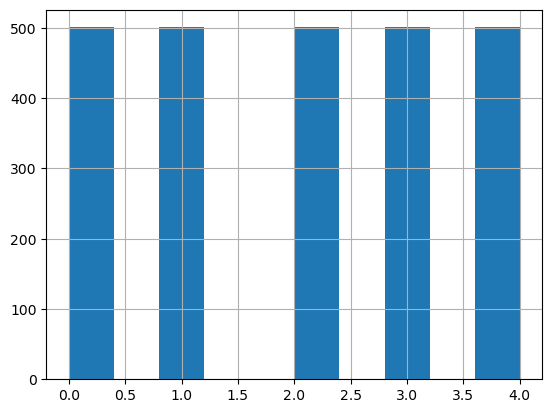

In [15]:
# Verificar balanceamento do dataset (qtde de cada classe)
motores['tipo_setup'].value_counts()

#Exibi-se o histograma das classes
# motores.tipo_setup.hist()